<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="center"><font color='#DEB887'>Super Market Exploratory Data Analysis</font></h3>
<div style="font-family:Georgia;background-color:'black'; font-color:'black',padding:30px; font-size:17px">




<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:pink;
           font-size:200%;
           font-family:Serif;
           letter-spacing:0.5px">

<p style="padding: 10px;
          color:black;
          font-size:120%;
          text-align:center;">
Goal of  Project :
</p>
</div>




In [27]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as p


In [7]:
df=pd.read_csv("C:\\Users\\RAVI\\Downloads\\data sets-20240328T070809Z-001\\data sets\\supermarket_sales - Sheet1.csv")

In [8]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [4]:
df.sample(3)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
517,521-18-7827,C,Naypyitaw,Member,Male,Home and lifestyle,39.39,5,9.8475,206.7975,1/22/2019,20:46,Credit card,196.95,4.761905,9.8475,8.7
308,512-98-1403,A,Yangon,Member,Female,Electronic accessories,26.48,3,3.9720,83.4120,3/21/2019,10:40,Ewallet,79.44,4.761905,3.9720,4.7
801,324-41-6833,C,Naypyitaw,Member,Female,Electronic accessories,30.20,8,12.0800,253.6800,3/3/2019,19:30,Ewallet,241.60,4.761905,12.0800,5.1


In [5]:
df.shape

(1000, 17)

In [6]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

##### - Column Description

- Invoice id: Computer generated sales slip invoice identification number

- Branch: Branch of supercenter (3 branches are available identified by A, B and C).

- City: Location of supercenters

- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

- Gender: Gender type of customer

- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in $

- Quantity: Number of products purchased by customer

- Tax: 5% tax fee for customer buying

- Total: Total price including tax

- Date: Date of purchase (Record available from January 2019 to March 2019)

- Time: Purchase time (10am to 9pm)

- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

- COGS: Cost of goods sold

- Gross margin percentage: Gross margin percentage
- Gross income: Gross income

- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10)






In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

# preprocessing

In [8]:
df.isnull().sum().to_frame().rename(columns={0:'missing values' }).T

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# checking the inconsistency

In [9]:
for i in df.columns:
    print(df[i].unique)


<bound method Series.unique of 0      750-67-8428
1      226-31-3081
2      631-41-3108
3      123-19-1176
4      373-73-7910
          ...     
995    233-67-5758
996    303-96-2227
997    727-02-1313
998    347-56-2442
999    849-09-3807
Name: Invoice ID, Length: 1000, dtype: object>
<bound method Series.unique of 0      A
1      C
2      A
3      A
4      A
      ..
995    C
996    B
997    A
998    A
999    A
Name: Branch, Length: 1000, dtype: object>
<bound method Series.unique of 0         Yangon
1      Naypyitaw
2         Yangon
3         Yangon
4         Yangon
         ...    
995    Naypyitaw
996     Mandalay
997       Yangon
998       Yangon
999       Yangon
Name: City, Length: 1000, dtype: object>
<bound method Series.unique of 0      Member
1      Normal
2      Normal
3      Member
4      Normal
        ...  
995    Normal
996    Normal
997    Member
998    Normal
999    Member
Name: Customer type, Length: 1000, dtype: object>
<bound method Series.unique of 0      Female
1

In [10]:
df_obj=df.select_dtypes(include='object')

In [11]:
df_obj

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,1/5/2019,13:08,Ewallet
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,3/8/2019,10:29,Cash
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,3/3/2019,13:23,Credit card
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,1/27/2019,20:33,Ewallet
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,2/8/2019,10:37,Ewallet
...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,1/29/2019,13:46,Ewallet
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,3/2/2019,17:16,Ewallet
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,2/9/2019,13:22,Cash
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,2/22/2019,15:33,Cash


In [12]:
for i in df_obj.columns:
    print(df_obj[i]-*8.unique())


SyntaxError: invalid decimal literal (4052190225.py, line 2)

In [ ]:
df_numeric=df.select_dtypes(excludes='object')


In [ ]:
df.duplicated()

In [ ]:
df['Date']=pd.to_datetime(df['Date'])
df['Time']=pd.to_datetime(df['Time'])


In [ ]:
df.dtypes

In [ ]:
from datetime import datetime as t

In [26]:
df["month"]=df.Date.dt.month_name()
df["day_name"]=df.Date.dt.day_name()
df["day"]=df.Date.t.day
df["year"]=df.Date.t.year
df["Hour"]=df.Time.t.Hour




AttributeError: 'Series' object has no attribute 't'

In [22]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
df.head(2)

In [18]:
df.drop(columns=['Invoice ID','Branch'],inplace=True)

In [ ]:
df.head(2)

In [ ]:
df.describe().T

In [19]:
cols=df.describe().T.index[:-3]

ValueError: Could not interpret input 'col'

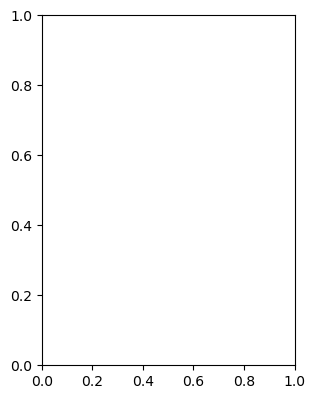

In [20]:
pos=1
p.figure(figsize=(15,10))
for col in cols:
    p.subplot(2,4,pos)
    sb.boxplot(x='col',data=df)
    p.title(col)
    pos=pos+1

In [16]:
df_numeric.corr()

NameError: name 'df_numeric' is not defined

In [6]:
df

NameError: name 'df' is not defined

In [22]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [ ]:
df.drop(columns=['Tax 5%','cogs','gross income'])

# total and avg sale of company

In [25]:
df['Total'].agg(['sum','mean'])

sum     322966.749000
mean       322.966749
Name: Total, dtype: float64

C:\Users\RAVI\AppData\Local\Temp\ipykernel_1460\1936372862.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(df['Total'])


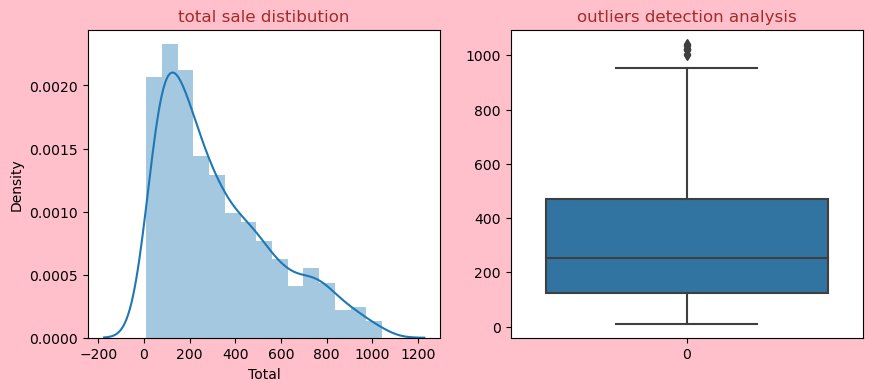

In [31]:
p.figure(figsize=(10,4),facecolor='pink')
p.subplot(1,2,1)
sb.distplot(df['Total'])
p.title('total sale distibution',color='brown',fontsize=12)
p.subplot(1,2,2)
sb.boxplot(df['Total'])
p.title('outliers detection analysis',fontsize=12,color='brown');
p.show()

# which city is found to be a more crowded

Text(0.5, 1.0, 'crowded city')

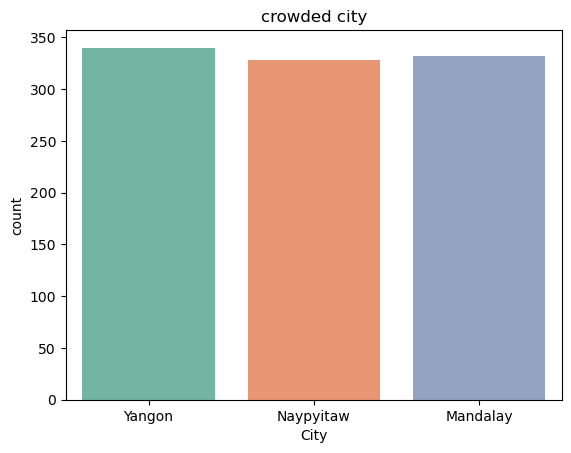

In [32]:
sb.countplot(x='City',data=df,palette='Set2')
p.title('crowded city')

# total and avg sale of each city

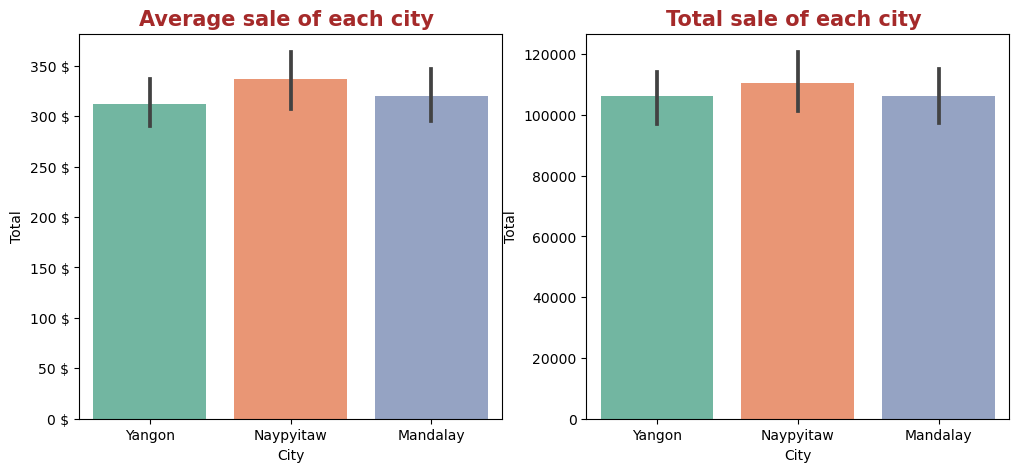

In [34]:
p.figure(figsize=(12,5))
p.subplot(1,2,1)
sb.barplot(x="City",y="Total",data=df,palette="Set2")
p.yticks([0,50,100,150,200,250,300,350],["0 $","50 $","100 $","150 $","200 $","250 $","300 $","350 $"])
p.title("Average sale of each city ",fontsize=15,color="brown",fontweight="bold")
p.subplot(1,2,2)
sb.barplot(x="City",y="Total",data=df,estimator=sum,palette="Set2")
p.title("Total sale of each city ",fontsize=15,color="brown",fontweight="bold");




# since the napyitaw is the hot selling city so we find the detail of napyitaw in 

In [35]:
df_n=df[df["City"]=="Naypyitaw"]
df_n[df_n["Total"]==df_n["Total"].max()]




,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
350,Naypyitaw,Member,Female,Fashion accessories,99.3,10,49.65,1042.65,2/15/2019,14:53,Credit card,993.0,4.761905,49.65,6.6


In [36]:
df_n=df[df["City"]=="Naypyitaw"]
df_n[df_n["Total"]==df_n["Total"].min()]




,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
822,Naypyitaw,Member,Male,Sports and travel,10.17,1,0.5085,10.6785,2/7/2019,14:15,Cash,10.17,4.761905,0.5085,5.9


# root cause analysis of hot selling city

<Axes: xlabel='City', ylabel='count'>

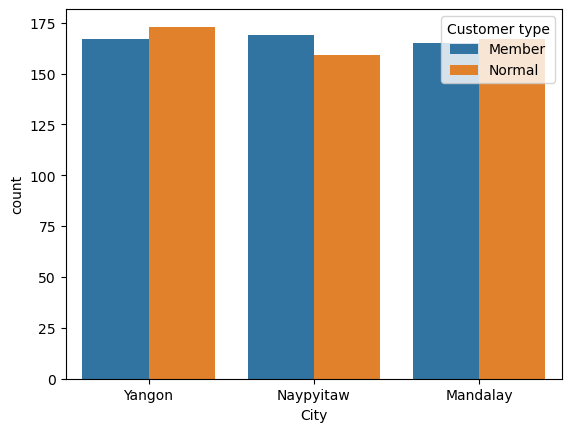

In [38]:
sb.countplot(x='City',data=df,hue='Customer type')

# rating

<Axes: xlabel='City', ylabel='Rating'>

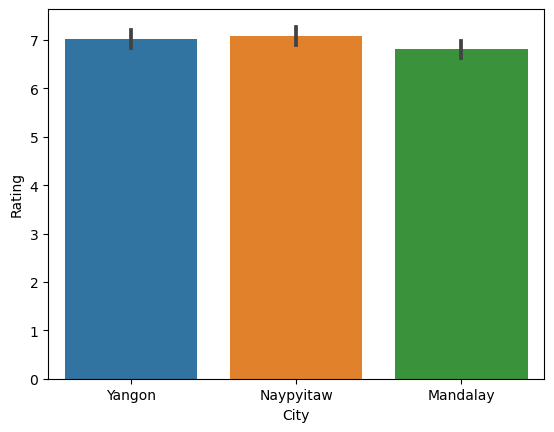

In [40]:
sb.barplot(x='City',y='Rating',data=df)

# sale trend of company over the three months

C:\Users\RAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\Users\RAVI\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x500 with 0 Axes>

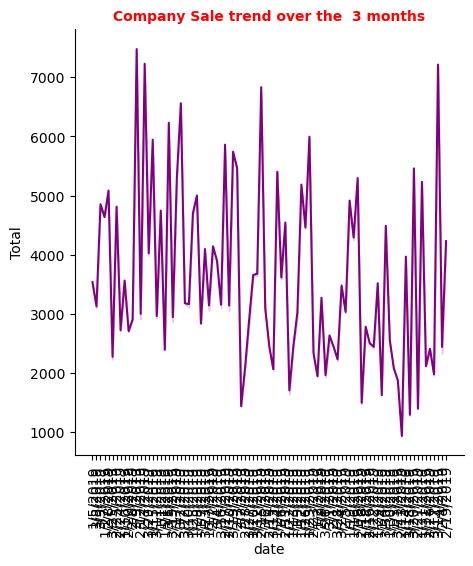

In [41]:
p.figure(figsize=(15,5))
sb.relplot(x="Date",y="Total",data=df,kind="line",color="purple",estimator=sum,ci=False)
p.xlabel("date")
p.title(" Company Sale trend over the  3 months ",fontsize=10,color="red",fontweight="bold")
p.xticks(rotation=90);




# sale trend of each city

In [42]:
df_n=df[df["City"]=="Naypyitaw"]
df_y=df[df["City"]=="Yangon"]
df_m=df[df["City"]=="Mandalay"]




In [43]:
cities=[df_y,df_n,df_m]



C:\Users\RAVI\AppData\Local\Temp\ipykernel_1460\2927881233.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sb.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
C:\Users\RAVI\AppData\Local\Temp\ipykernel_1460\2927881233.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sb.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
C:\Users\RAVI\AppData\Local\Temp\ipykernel_1460\2927881233.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sb.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)


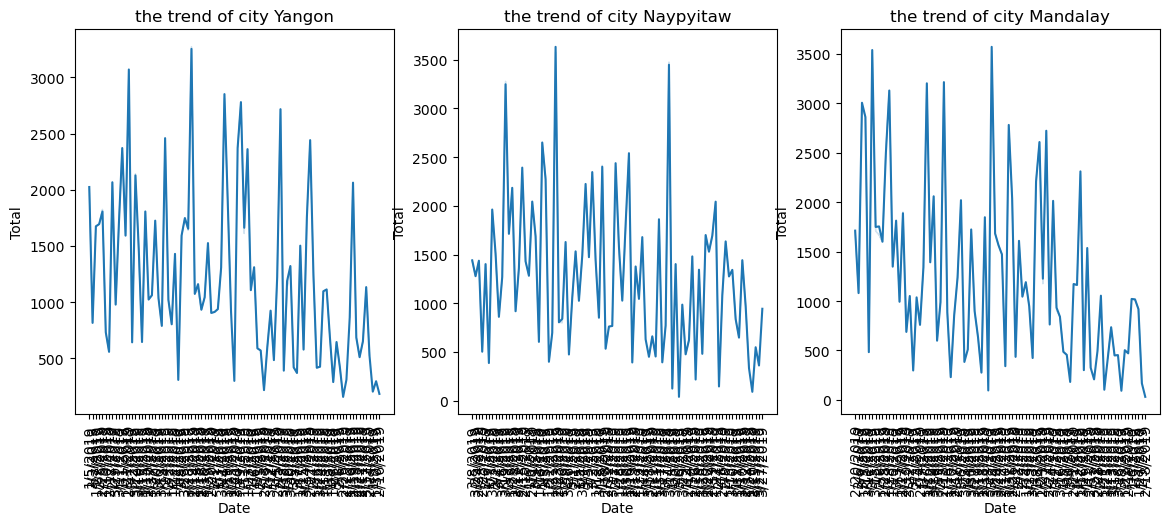

In [44]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
p.figure(figsize=(14,5))
for city in cities:
    #print(city)
    p.subplot(1,3,pos)
    sb.lineplot(x="Date",y="Total",data=city,estimator=sum,ci=False)
    p.title(f"the trend of city {city_name[pos-1]}")
    p.xticks(rotation=90)
    pos=pos+1
    



# find the highest business revenue month of the compnay

In [4]:
sb.barplot(x="month",y="Total",data=df,estimator=sum,palette="Set2");



NameError: name 'df' is not defined

# business revenue in %age of each month

In [53]:
df.groupby(["month"])["Total"].agg(["sum"])





KeyError: 'month'

In [54]:
df.columns

Index(['City', 'Customer type', 'Gender', 'Product line', 'Unit price',
       'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

# find the highest business revenue month of the city

# customer visiting trend of each branch

# hot selling day of the comapny

# hot selling day of each city

# find the total weekend and weekday sale of each company

# find the total weekend and weekday sale of each company of each city in each month

# find the most revenue generating product of the company

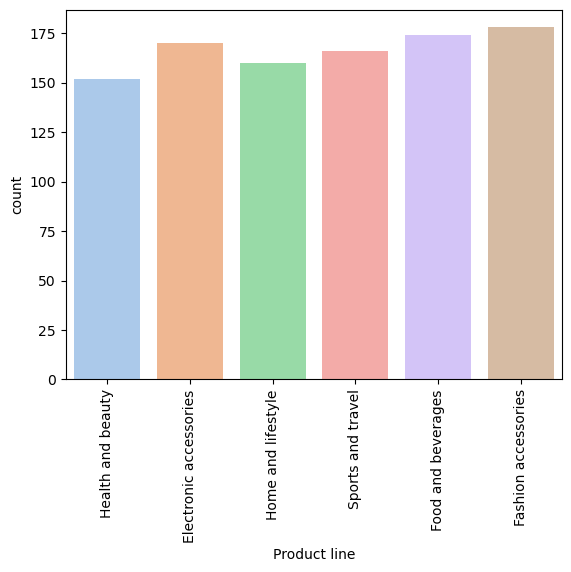

In [10]:
sb.countplot(x="Product line",data=df,palette="pastel")
p.xticks(rotation=90);




In [11]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as p

C:\Users\RAVI\AppData\Local\Temp\ipykernel_15068\1414878189.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.barplot(x="City",y="Total",estimator=sum,data=df,palette="Set2",hue="Product line",ci=None)


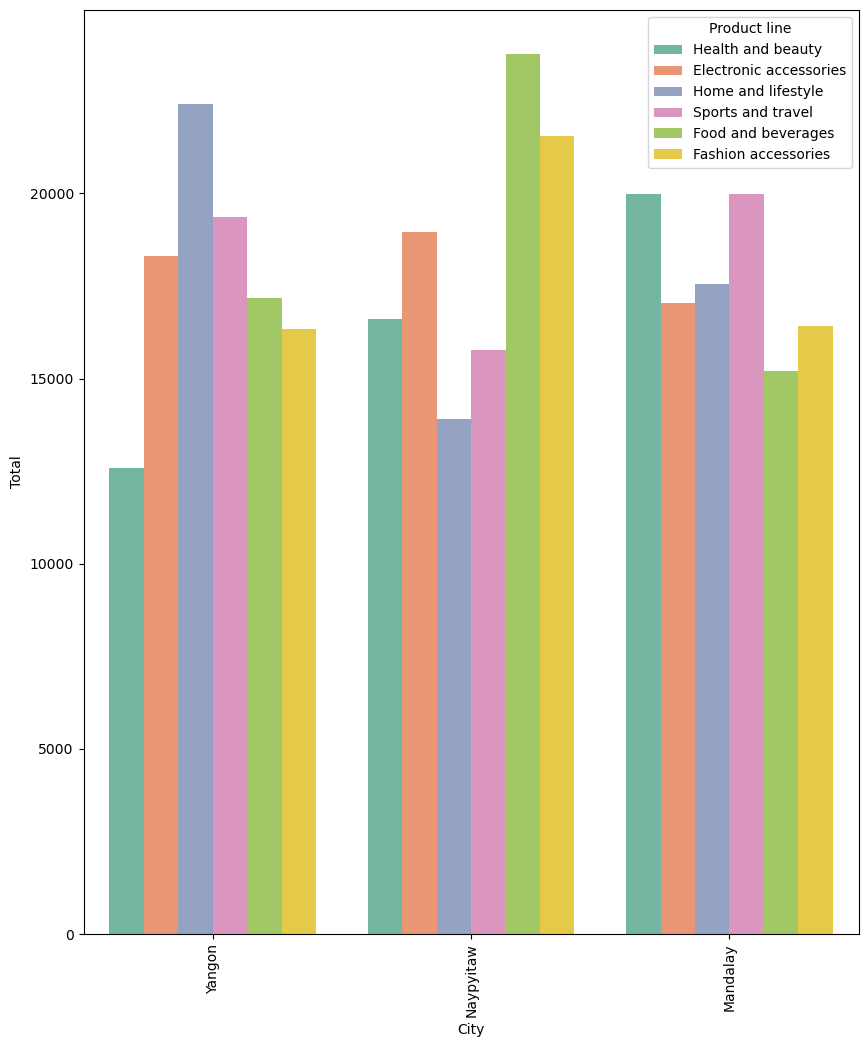

In [12]:
p.figure(figsize=(10,12))
sb.barplot(x="City",y="Total",estimator=sum,data=df,palette="Set2",hue="Product line",ci=None)
p.xticks(rotation=90);




# find city and month wise demand

In [ ]:
# find the monthly sale of each product 

# peak time of the customer visit at supermarket

# customer visiting time

In [27]:
p.figure(figsize=(17,9))
sb.relplot(x="Hour",y="Total",data=df,estimator=sum,kind="line",ci=None)




ValueError: Could not interpret value `Hour` for parameter `x`

<Figure size 1700x900 with 0 Axes>

NameError: name 'city' is not defined

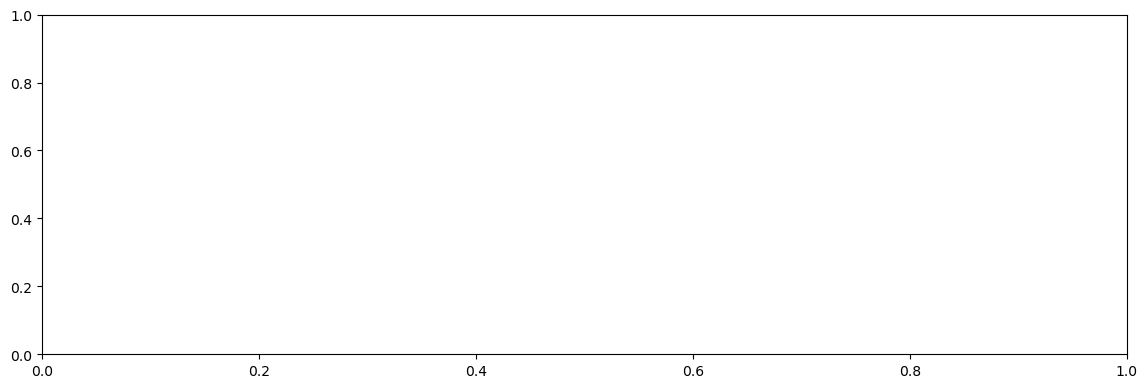

In [31]:
city_name=["Yangon", 'Naypyitaw', 'Mandalay']
pos=1
p.figure(figsize=(14,15))
for i in city_name:
    #print(city)
    p.subplot(3,1,pos)
    sb.lineplot(x="Hour",y="Total",data=city,estimator=sum,ci=False)
    p.title(f" hourly sale trend of {city_name[pos-1]}")
    p.xticks(rotation=90)
    pos=pos+1




C:\Users\RAVI\AppData\Local\Temp\ipykernel_15068\953717412.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sb.lineplot(x="hour",y="Total",data=i,estimator=sum,ci=None,hue="Product line")


ValueError: Could not interpret value `hour` for parameter `x`

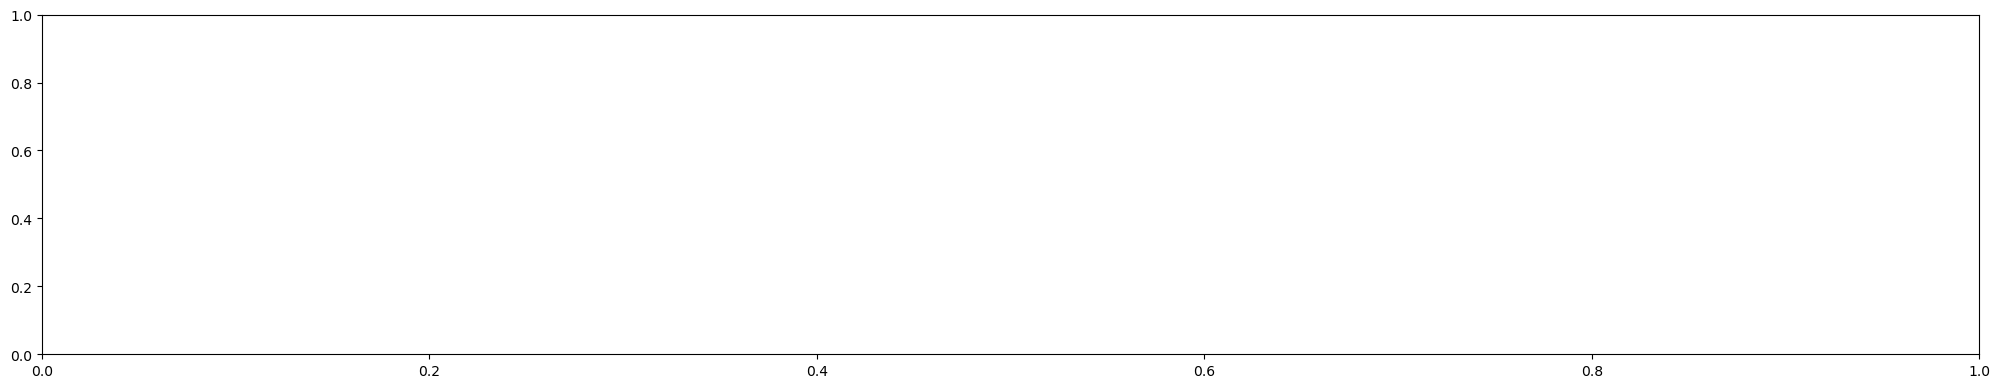

In [33]:
city=['Yangon', 'Naypyitaw', 'Mandalay']
pos=1
p.figure(figsize=(25,15))
for i in city:
    p.subplot(3,1,pos)
    sb.lineplot(x="hour",y="Total",data=i,estimator=sum,ci=None,hue="Product line")
    p.title(f"peak time of branch {city[pos-1]}")
    p.xticks(list(range(10,21)))
    pos=pos+1
    




total customers :  1000


<Axes: xlabel='Gender', ylabel='count'>

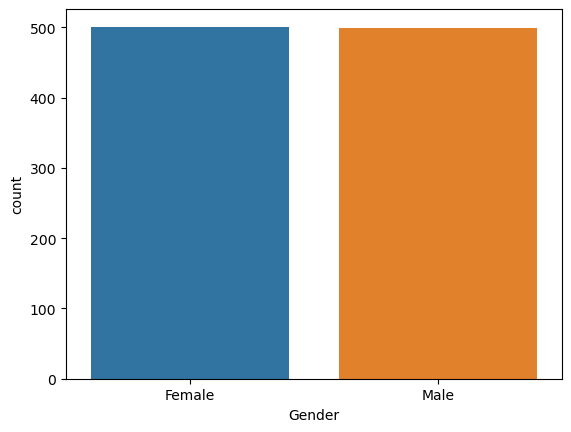

In [34]:
print("total customers : ",df["Gender"].count())
sb.countplot(x="Gender",data=df)




# total male and female customers in  each city

<Axes: xlabel='City', ylabel='count'>

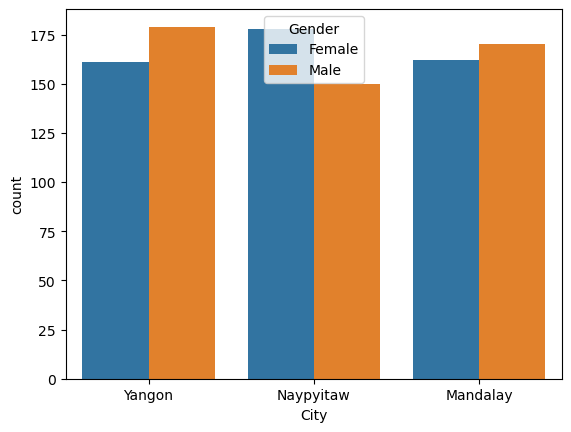

In [35]:
sb.countplot(x="City",data=df,hue="Gender")



# who contributed most in each city

<Axes: xlabel='City', ylabel='Total'>

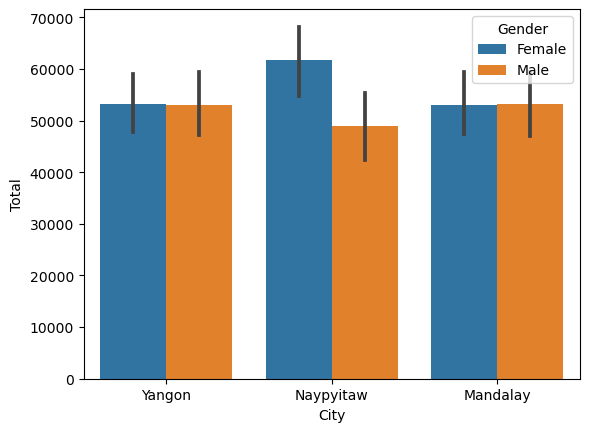

In [37]:
sb.barplot(x="City",y="Total",data=df,estimator=sum,hue="Gender")



# which type of customer  visiting most

<Axes: xlabel='City', ylabel='count'>

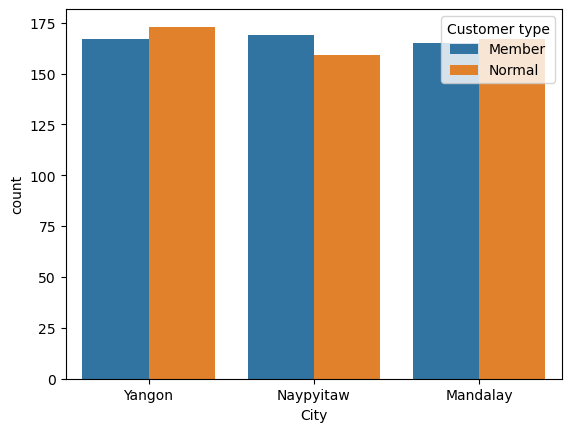

In [38]:
sb.countplot(x="City",data=df,hue="Customer type")



# from which customer type generate highest business  

NameError: name 'df_y' is not defined

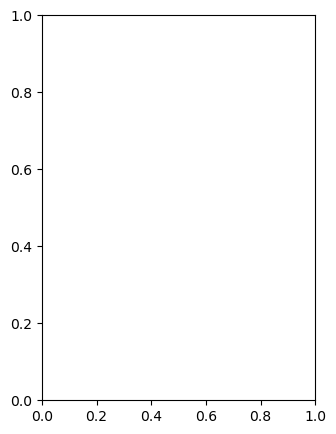

In [39]:
p.figure(figsize=(12,5))
p.subplot(1,3,1)
p.pie(df_y["Payment"].value_counts().values,labels=df_y["Payment"].value_counts().index,autopct="%.2f%%")
p.title("% of customers based on \nmode of payement of city yangon")
p.subplot(1,3,2)
p.pie(df_m["Payment"].value_counts().values,labels=df_m["Payment"].value_counts().index,autopct="%.2f%%")
p.title("% of customers based on \n mode of payement of city mandalay")
p.subplot(1,3,3)
p.pie(df_n["Payment"].value_counts().values,labels=df_n["Payment"].value_counts().index,autopct="%.2f%%")
p.title("% of customers based on\n mode of payement of city naypayitaw");




In [40]:
print(len(df[df["Rating"]==4.0]), "customers had given 4 rating")
print((len(df[df["Rating"]==4.0])*100)/df["Rating"].count(),"% customers had given 10 rating")




11 customers had given 4 rating
1.1 % customers had given 10 rating


In [41]:
print(len(df[df["Rating"]<=5.0]), "customers had given below rating")
print((len(df[df["Rating"]<=5.0])*100)/df["Rating"].count(),"% customers had given below 5 rating")




174 customers had given below rating
17.4 % customers had given below 5 rating
